In [1259]:
import pandas as pd

In [1260]:
data=pd.read_excel('data/data1.xlsx')
for i in range(2,35):
    d=pd.read_excel('data/data'+str(i)+'.xlsx')
    data=pd.concat([data,d],axis=0,ignore_index=True)

In [1261]:
data.shape

(2822, 3)

In [1262]:
data

,Name,Comment,Label
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0
1,Preetom Mazumder,"Like I said, World Cup of Goalkeepers",NaN
2,Mizanur Rahman Rupok,Well played Canada 🇨🇦🇨🇦🇨🇦 bed luck..,NaN
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0
...,...,...,...
2817,Gojicream-Bangladesh,"Gojicream-Bangladesh⭐🍒তৈলাক্ত ত্বক , ব্রণ ,ও ব...",7.0
2818,Md. RozZin Khan,এটা নেশায় পরিণত হয়েছে। নতুন কিছু না,1.0
2819,MD Reazul Islam Badol,একটু বেশি আড্ডা ও বাড়াবাড়ি....,1.0
2820,Mohammad Rajib Ahmed,রাজনীতিবিদরা চিন্তায় পরে গেছে এতো ডাকাডাকির পর...,6.0


In [1263]:
data.to_excel('merged_data.xlsx',index=False)

In [1264]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 2822 
Statements: 950 
Criticism: 259 
Offensive: 500 
Proposition: 37 
Interrogation: 66 
Sarcasm: 314 
Irrelevant: 66


In [1265]:


# # print some unprocessed reviews
# sample_data = [10,100,150,200,250,600,650,666,689,640,650,700,750,800,1000]
# for i in sample_data:
#       print(data.Comment[i],'\n','Sentiment:-- ',data.Label[i],'\n')



In [1266]:
#drop the rows with Label==nan
data.dropna(subset=['Label'],inplace=True)

In [1267]:
data.shape

(2192, 3)

In [1268]:
print("Total Comments:",len(data),
      "\nStatements:",len(data[data.Label==1]),
      "\nCriticism:",len(data[data.Label==2]),
      "\nOffensive:",len(data[data.Label==3]),
      "\nProposition:",len(data[data.Label==4]),
      "\nInterrogation:",len(data[data.Label==5]),
      "\nSarcasm:",len(data[data.Label==6]),
      "\nIrrelevant:",len(data[data.Label==7]),)

Total Comments: 2192 
Statements: 950 
Criticism: 259 
Offensive: 500 
Proposition: 37 
Interrogation: 66 
Sarcasm: 314 
Irrelevant: 66


In [1269]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer

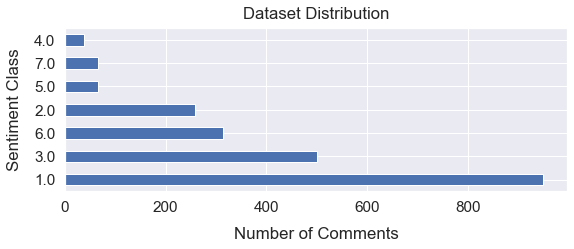

In [1270]:
sns.set(font_scale=1.4)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 0)
plt.title("Dataset Distribution", y=1.02);

In [1271]:

from bangla_stemmer.stemmer import stemmer
# Data cleaning function
def process_comments(Comment): 
    Comment = re.sub('[^\u0980-\u09FF]',' ',str(Comment)) #removing unnecessary punctuation
    stmr = stemmer.BanglaStemmer()
    stm = stmr.stem(Comment.split())
    ss = ' '.join(stm)
    return ss
     



In [1272]:
#value counts of each label
data['Label'].value_counts()

1.0    950
3.0    500
6.0    314
2.0    259
5.0     66
7.0     66
4.0     37
Name: Label, dtype: int64

In [1273]:


# Apply the function into the dataframe
data['cleaned'] = data['Comment'].apply(process_comments)  
data.shape

applied fourth rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied fourth rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied second rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied fourth rules..
applied fourth rules..
applied first rules..
applied second rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied first rules..
applied first rules..
applied fourth rules..
applied first rules..
applied fourth rules..
applied fourth rules..
appli

(2192, 4)

In [1274]:
#value counts of each label
data['Label'].value_counts()
data.shape

(2192, 4)

In [1275]:
data.head(50)

,Name,Comment,Label,cleaned
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচ দল থেক হার পর ও যার চেঁচায় তার পৃথিব...
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানা ভাগ্য খারাপ না হয় বেলজিয়াম খারাপ খবর ছিল ...
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেলা আশ...
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললে জিতা জায় না এটা তার প্রমান
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদি ১ ০ গোলে হার তবু এই কানাডা দূর্দান্ত এর সে...
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সাল বেলজিয়াম খুঁজে পাচ্ না বেলজিয়াম কিভাব...
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময় বিশ্ব অন্যতম সের গোলরক্ষক কর্তুয়া
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,এক ভালো ফিনিশার অভাবে এত ভালো খাল শেষ পর্যন্ত ...


In [1276]:
#length of the comments
data['length'] = data['cleaned'].apply(lambda x: len(x.split()))

In [1277]:
data.head(20)

,Name,Comment,Label,cleaned,length
0,মোহাম্মদ সোহেল রানা,খেললো কানাডাজিতলো লেংড়াডা,3.0,খেললো কানাডাজিতলো লেংড়াডা,3
3,Mohammed Ahmad,"৫০ধাপ নিচের দল থেকে হারের পর ও যারা চেঁচায়, তা...",3.0,৫০ধাপ নিচ দল থেক হার পর ও যার চেঁচায় তার পৃথিব...,14
4,Tarek Aziz,কানাডার ভাগ্য খারাপ না হয় বেলজিয়ামের খারাপ খবর...,2.0,কানা ভাগ্য খারাপ না হয় বেলজিয়াম খারাপ খবর ছিল ...,24
5,Parvej Sheikh,তবে খেলা ভালো হয়েছে।।,2.0,তবে খেলা ভালো হয়,4
6,এইচ আর আবির,অভিনন্দন প্রিয় বেলজিয়াম 🇧🇪❤️তবে আরো ভালো খেল...,2.0,অভিনন্দন প্রিয় বেলজিয়াম তবে আরো ভালো খেলা আশ...,10
7,Faysal Ahamed,ভালো খেললেই জিতা জায় না এটা তার প্রমান 😂,2.0,ভালো খেললে জিতা জায় না এটা তার প্রমান,8
8,Md Kamruzzaman,যদিও ১-০ গোলে হারছে। তবুও এই কানাডা দূর্দান্ত ...,2.0,যদি ১ ০ গোলে হার তবু এই কানাডা দূর্দান্ত এর সে...,71
9,Mia Ashik,২০১৮ সালের বেলজিয়ামকে খুঁজে পাচ্ছি না 🇧🇪😪বেলজি...,2.0,২০১৮ সাল বেলজিয়াম খুঁজে পাচ্ না বেলজিয়াম কিভাব...,11
10,Zahadul Islam Parvez,বর্তমান সময়ের বিশ্বের অন্যতম সেরা গোলরক্ষক কর্...,1.0,বর্তমান সময় বিশ্ব অন্যতম সের গোলরক্ষক কর্তুয়া,7
12,M Russell Islam Raz,একটা ভালো ফিনিশারের অভাবে এত ভালো খেলেও শেষ পর...,2.0,এক ভালো ফিনিশার অভাবে এত ভালো খাল শেষ পর্যন্ত ...,14


In [1278]:
#count the number of comments with length equal to 0
data[data['length']==0].shape


(12, 5)

# modifications in dataset

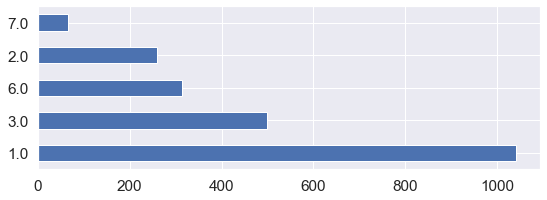

In [1279]:
#drop the rows with length==0
data.drop(data[data['length']==0].index,inplace=True)
#drop the name column
data.drop('Name',axis=1,inplace=True)
#change the label 4,5 to 1
data['Label'].replace({4:1,5:1},inplace=True)
data['Label'].value_counts().plot(kind='barh', figsize=(9, 3))
#shuffle the data
data = data.sample(frac=1).reset_index(drop=True)


In [1280]:
data.shape

(2180, 4)

In [1281]:
data

,Comment,Label,cleaned,length
0,ফালতু নিউজ,2.0,ফালতু নিউজ,2
1,য়ত পাগল আছে সব ব্রা... মিথ্যা কথা বলে তার চৌদ...,3.0,য়ত পাগল আছ সব ব্ মিথ্যা কথা বলে তার চৌদ্দ গোষ্...,16
2,মেসি ৩ পুয়ার বাব😁,1.0,মেসি ৩ পুয় বাব,4
3,বাদ দেন বাই বেডি মানুষ,3.0,বাদ দেন বাই বেডি মানুষ,5
4,আমি কে তুমি কেপাংয়ালি পাংয়ালি,7.0,আমি কে তুমি কেপাংয়া পাংয়া,5
...,...,...,...,...
2175,"এরা পু***** মারামারিতে বেশি ব্যস্ত, খেলবে কি করে!",3.0,এর পু মারামারি বেশি ব্যস্ত খেলবে কি করে,8
2176,মেয়েটির মাথা ভর্তি গোবর। মেসি আর ডিমারিয়া কে...,3.0,মেয়ে মাথা ভর্তি গোবর মেসি আর ডিমারিয়া কে বলে...,18
2177,যা করার তা বাদ দিয়ে অন্য কিছুতে মনোযোগ দিলে য...,1.0,যা কর তা বাদ দিয়ে অন্য কিছু মনোযোগ দিলে যা হয়,11
2178,১টি,1.0,১টি,1


In [1282]:
data.reset_index(drop=True,inplace=True)
len(data[data.Label==1])+len(data[data.Label==2])+len(data[data.Label==3])+len(data[data.Label==6])+len(data[data.Label==7])

2180

In [1283]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.Label.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.Label==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.Label==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.Label==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

In [1284]:
#call the fucntion
# documents,words,u_words,class_names = data_summary(data)

In [1285]:
def information(data):
    labels=set(data.Label)
    print(labels)
    documents = []
    words = []
    u_words = []
    for label in labels:
        print(label,':',len(data[data.Label==label]))
        comments=data[data.Label==label].cleaned
        documents.append(len(comments))
        # unique_words=[]
        # for comment in comments:
        #     for word in comment.strip().split():
        #         if(word not in unique_words):
        #             unique_words.append(word)
        # print('Unique words:',len(unique_words))
        unique_words=set()
        total_words=0
        all_words=[]
        for comment in comments:
            for word in comment.split():
                total_words+=1
                all_words.append(word)
                unique_words.add(word)
        print('Unique words:',len(unique_words))
        u_words.append(len(np.unique(all_words)))
        print('Total words:',total_words)
        words.append(total_words)
        print('Average words per comment:',total_words/len(comments))
        #list of tuples
        most_freq_words=pd.value_counts(np.array(all_words))
        print('Most frequent words:\n',most_freq_words[:10]) 
    return documents,words,u_words,list(labels)      
    

documents,words,u_words,labels=information(data)

{1.0, 2.0, 3.0, 6.0, 7.0}
1.0 : 1042
Unique words: 2733
Total words: 10023
Average words per comment: 9.619001919385797
Most frequent words:
 না         150
কর         117
ব্রাজিল     99
টি          98
এ           90
বার         89
১৬          85
এই          74
গোলে        73
আর          71
dtype: int64
2.0 : 259
Unique words: 2027
Total words: 5725
Average words per comment: 22.104247104247104
Most frequent words:
 না      93
কর      91
আর      62
করে     61
খেলা    51
এক      50
হয়      50
তার     46
ভালো    44
দল      43
dtype: int64
3.0 : 500
Unique words: 1973
Total words: 4995
Average words per comment: 9.99
Most frequent words:
 না         80
কর         75
আর         64
করে        56
হয়         47
কি         44
ব্রাজিল    38
এক         38
এই         38
তো         29
dtype: int64
6.0 : 313
Unique words: 1374
Total words: 3356
Average words per comment: 10.722044728434504
Most frequent words:
 না             63
আর             46
কর             42
করে            41
হয়             3

In [1286]:
len(data[data.Label==1])

1042

In [1287]:
documents

[1042, 259, 500, 313, 66]

In [1288]:
labels

[1.0, 2.0, 3.0, 6.0, 7.0]

In [1289]:
words

[10023, 5725, 4995, 3356, 1946]

In [1290]:
u_words

[2733, 2027, 1973, 1374, 1025]

In [1291]:
Info_df=pd.DataFrame({'Labels':labels,'Documents':documents,'Words':words,'Unique Words':u_words})
Info_df

,Labels,Documents,Words,Unique Words
0,1.0,1042,10023,2733
1,2.0,259,5725,2027
2,3.0,500,4995,1973
3,6.0,313,3356,1374
4,7.0,66,1946,1025


<AxesSubplot:xlabel='Labels'>

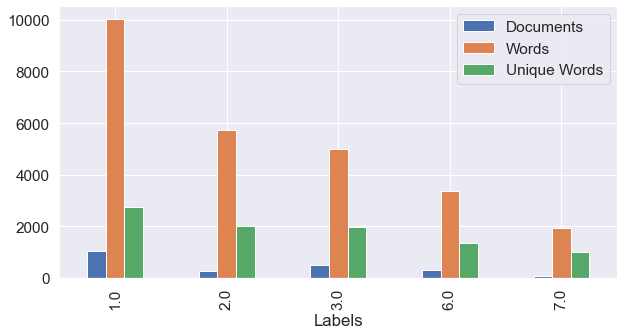

In [1292]:
Info_df.plot.bar(x='Labels',y=['Documents','Words','Unique Words'],figsize=(10,5))

In [1293]:
dataset=data

# Calculate the Review of each of the Review
dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

In [1294]:
#is length and review length same?
dataset[dataset.length!=dataset.ReviewLength].shape

(0, 5)

In [1295]:
frequency

{2: 148,
 16: 44,
 4: 226,
 5: 177,
 35: 4,
 3: 204,
 9: 103,
 6: 143,
 27: 20,
 7: 150,
 17: 31,
 1: 94,
 8: 125,
 30: 13,
 20: 24,
 105: 1,
 14: 61,
 46: 2,
 13: 59,
 22: 16,
 21: 19,
 11: 92,
 15: 40,
 52: 3,
 34: 7,
 10: 69,
 31: 14,
 87: 2,
 12: 58,
 28: 15,
 25: 6,
 23: 25,
 19: 19,
 37: 5,
 18: 26,
 54: 2,
 24: 14,
 26: 15,
 153: 3,
 60: 1,
 122: 1,
 55: 2,
 77: 1,
 45: 4,
 157: 1,
 40: 3,
 80: 1,
 33: 9,
 49: 2,
 29: 7,
 36: 5,
 39: 3,
 68: 1,
 58: 2,
 51: 3,
 48: 2,
 174: 1,
 38: 4,
 32: 4,
 115: 2,
 43: 3,
 84: 1,
 71: 1,
 67: 3,
 146: 1,
 61: 2,
 42: 4,
 44: 1,
 62: 2,
 59: 2,
 66: 1,
 226: 1,
 86: 2,
 47: 1,
 199: 1,
 147: 1,
 137: 1,
 195: 1,
 107: 1,
 50: 2,
 74: 2,
 70: 1,
 109: 1,
 178: 1,
 83: 1,
 282: 1,
 97: 1,
 88: 1,
 41: 1}

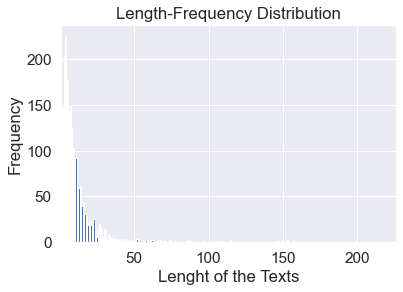

In [1296]:
plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, max(frequency.values()))
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()    

In [1297]:
sorted_freq=sorted(frequency.items(), key=lambda x: x[1], reverse=True)
sorted_freq

[(4, 226),
 (3, 204),
 (5, 177),
 (7, 150),
 (2, 148),
 (6, 143),
 (8, 125),
 (9, 103),
 (1, 94),
 (11, 92),
 (10, 69),
 (14, 61),
 (13, 59),
 (12, 58),
 (16, 44),
 (15, 40),
 (17, 31),
 (18, 26),
 (23, 25),
 (20, 24),
 (27, 20),
 (21, 19),
 (19, 19),
 (22, 16),
 (28, 15),
 (26, 15),
 (31, 14),
 (24, 14),
 (30, 13),
 (33, 9),
 (34, 7),
 (29, 7),
 (25, 6),
 (37, 5),
 (36, 5),
 (35, 4),
 (45, 4),
 (38, 4),
 (32, 4),
 (42, 4),
 (52, 3),
 (153, 3),
 (40, 3),
 (39, 3),
 (51, 3),
 (43, 3),
 (67, 3),
 (46, 2),
 (87, 2),
 (54, 2),
 (55, 2),
 (49, 2),
 (58, 2),
 (48, 2),
 (115, 2),
 (61, 2),
 (62, 2),
 (59, 2),
 (86, 2),
 (50, 2),
 (74, 2),
 (105, 1),
 (60, 1),
 (122, 1),
 (77, 1),
 (157, 1),
 (80, 1),
 (68, 1),
 (174, 1),
 (84, 1),
 (71, 1),
 (146, 1),
 (44, 1),
 (66, 1),
 (226, 1),
 (47, 1),
 (199, 1),
 (147, 1),
 (137, 1),
 (195, 1),
 (107, 1),
 (70, 1),
 (109, 1),
 (178, 1),
 (83, 1),
 (282, 1),
 (97, 1),
 (88, 1),
 (41, 1)]

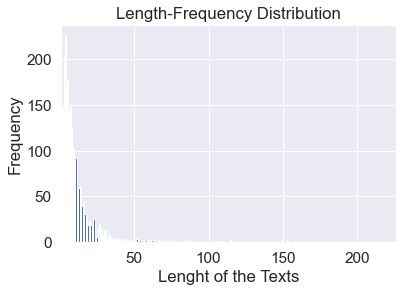

In [1298]:
plt.bar( [key for (key, val) in sorted_freq], [val for (key, val) in sorted_freq], align='center')
plt.xlim(1, max(frequency.values()))
# in this notbook color is not working but it should work.
plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show() 

# Dataset Splitting

In [1299]:
def dataset_split(feature_space,sentiment):
    """
    This function will return the splitted (80%-20%) feature vector . 
    
    Args:
        feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array) 
        
    Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
    """

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.9,
                                                  test_size = 0.1,random_state =0,shuffle=False)
    # print("Feature Size :======>",X_train.shape[1])
    # print("\nDataset Distribution:\n")
    # print("\tSet Name","\t\tSize")
    # print("\t========\t\t======")

    # print("\tFull\t\t\t",feature_space.shape[0],
    #     "\n\tTraining\t\t",X_train.shape[0],
    #     "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [1300]:
X_train,X_test,y_train,y_test = dataset_split(dataset['cleaned'],dataset['Label'])
y_train

0       2.0
1       3.0
2       1.0
3       3.0
4       7.0
       ... 
1957    3.0
1958    1.0
1959    3.0
1960    1.0
1961    2.0
Name: Label, Length: 1962, dtype: float64

In [1301]:


dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))


# Model Building Using Machine Learning Feature Extraction Using TF-IDF

In [1302]:
#======================================
                                            ##### Unigram Tf-idf value calculation
                                            #======================================
            
def calc_gram_tfidf(reviews,gram):
    """
    This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
        
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)
    """
    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [1303]:


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve



In [1304]:
#============================================
                                              #########  Classifiers Defination  #########
                                              #============================================
def ml_models_defination(): 
    """
    This function consists the models defination for All gram Features
    
    Retuns:
        ml_models: list of models
        model_names: list of model_names
    
    """
    
    lr_model = LogisticRegression(random_state = 123)
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    #model_names = ['Logistic Regression']
    # Create list of models
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    #ml_models = [lr_model]
    return ml_models,model_names 

In [1305]:
def model_performance(model,X_train,X_test,y_train,y_test):
    """
    This function will return the performance parameter values of each ML models.
    Performance parameters are Accuracy, F1-Score, Precision, Recall.
    
    Args:
        model: a ML model instance
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 
        
    Returns:
        my_dict: a dictionary of all the parameters for each models
    """
    print("model = "+model.__class__.__name__)
    my_dict = {}
    model.fit(X_train,y_train)
    # Prediction
    pred_y = model.predict(X_test)

    pred_train_set=model.predict(X_train)

    count=0

    for index,row in dataset.iterrows():
        # print(row['cleaned'])
        # print(row['Label'])
        if index<0.9*len(dataset):
            # print(pred_train_set[index])
            if row['Label']==pred_train_set[index]:
                count+=1
        else:
            # print(pred_y[int(index-0.9*len(dataset))])
            if row['Label']==pred_y[int(index-0.9*len(dataset))]:
                count+=1
    
    print("Total length = "+ str(len(dataset)))
    print("Total correct prediction = "+str(count))
    print(model.__class__.__name__+" Accuracy = "+str(count/len(dataset)))
    # print(pd.Series(pred_y).value_counts())
        
            
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='macro'),4)*100 
    
    return my_dict 

In [1306]:
def performance_table(performance_dict):
    """
    This function will create a dataframe of all the performance parameters.
    
    Args:
        performance_dict: a dictionary of all the parameters for each models
        
    Returns:
        performance_df: a dataframe
    """

    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df

In [1307]:
#==================================================
                                       ################# Label Encoding Function #########
                                       #==================================================

def label_encoding(sentiment,bool):
    """
    This function will return the encoded labels in array format. 
    
    Args:
        sentiment: series of class names(str)
        bool: boolean (True or False)
        
    Returns:
        labels: numpy array 
    """
    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) # Converting into numpy array
    class_names =le.classes_ ## Define the class names again
    if bool == True:
        print("\n\t\t\t===== Label Encoding =====","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels


# Model Training


In [1308]:
## save the performance of the model for each gram feature 
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    # labels = label_encoding(dataset.Label,False)
    labels = dataset.Label
    X_train,X_test,y_train,y_test = dataset_split(feature,labels)
    # print(X_train) 
    ml_models,model_names = ml_models_defination()
    # call model accuracy function and save the metrices into a dictionary
    accuracy = {f'{model_names[j]}':model_performance(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    #Save the performance parameter into json file
    with open(f'./{gram_names[i]}_performance.json', 'w') as fp:
        json.dump(accuracy, fp)

model = LogisticRegression
Total length = 2180
Total correct prediction = 1671
LogisticRegression Accuracy = 0.7665137614678899
model = DecisionTreeClassifier


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 2054
DecisionTreeClassifier Accuracy = 0.9422018348623853
model = RandomForestClassifier
Total length = 2180
Total correct prediction = 2063
RandomForestClassifier Accuracy = 0.9463302752293578
model = MultinomialNB
Total length = 2180
Total correct prediction = 1925
MultinomialNB Accuracy = 0.8830275229357798
model = KNeighborsClassifier
Total length = 2180
Total correct prediction = 1483
KNeighborsClassifier Accuracy = 0.6802752293577982
model = SVC
Total length = 2180
Total correct prediction = 1071
SVC Accuracy = 0.49128440366972476
model = SVC


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 1141
SVC Accuracy = 0.523394495412844
model = LogisticRegression


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 1761
LogisticRegression Accuracy = 0.8077981651376147
model = DecisionTreeClassifier


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 2061
DecisionTreeClassifier Accuracy = 0.9454128440366972
model = RandomForestClassifier
Total length = 2180
Total correct prediction = 2068
RandomForestClassifier Accuracy = 0.9486238532110092
model = MultinomialNB
Total length = 2180
Total correct prediction = 2051
MultinomialNB Accuracy = 0.9408256880733945
model = KNeighborsClassifier
Total length = 2180
Total correct prediction = 1493
KNeighborsClassifier Accuracy = 0.6848623853211009
model = SVC
Total length = 2180
Total correct prediction = 1045
SVC Accuracy = 0.4793577981651376
model = SVC


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 1076
SVC Accuracy = 0.4935779816513762
model = LogisticRegression


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 1770
LogisticRegression Accuracy = 0.8119266055045872
model = DecisionTreeClassifier


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 2059
DecisionTreeClassifier Accuracy = 0.9444954128440367
model = RandomForestClassifier
Total length = 2180
Total correct prediction = 2067
RandomForestClassifier Accuracy = 0.9481651376146789
model = MultinomialNB
Total length = 2180
Total correct prediction = 2058
MultinomialNB Accuracy = 0.9440366972477064
model = KNeighborsClassifier
Total length = 2180
Total correct prediction = 1477
KNeighborsClassifier Accuracy = 0.6775229357798165
model = SVC
Total length = 2180
Total correct prediction = 1044
SVC Accuracy = 0.47889908256880737
model = SVC


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Total length = 2180
Total correct prediction = 1062
SVC Accuracy = 0.4871559633027523


e:\Installation\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1309]:

# Load all the json files
gram_names = ['Unigram','Bigram','Trigram']
with open(f'./performance.txt', 'w') as f:
  f.write('\n')

for gram in gram_names:
  accuracy = json.load(open(f'./{gram}_performance.json'))
  table = performance_table(accuracy)
  print(f"\n========== Performance Table for {gram} feature:========\n",table)
  print(f"\n========In case of {gram} feature:========\n")
  print(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}")
  print(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}")
  print(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}")
  print(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}")
  #save all this in a text file
  with open(f'./performance.txt', 'a') as f:
    f.write(f"\n========== Performance Table for {gram} feature:========\n")
    f.write(f"{table}")
    f.write(f"\n========In case of {gram} feature:========\n")
    f.write(f"Highest Accuracy achieved by {table['Model Name'][table.Accuracy.idxmax(axis = 0)]} at = {max(table.Accuracy)}\n")
    f.write(f"Highest F1-Score achieved by {table['Model Name'][table['F1 Score'].idxmax(axis = 0)]} at = {max(table['F1 Score'] )}\n")
    f.write(f"Highest Precision Score achieved by {table['Model Name'][table['Precision'].idxmax(axis = 0)]} at = {max(table['Precision'] )}\n")
    f.write(f"Highest Recall Score achieved by {table['Model Name'][table['Recall'].idxmax(axis = 0)]} at = {max(table['Recall'] )}\n")





========== Performance Table for Unigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     50.46      42.75   26.39     24.47          LR
1     46.33      31.99   28.75     29.22          DT
2     50.46      42.45   26.57     25.68          RF
3     51.38      36.15   30.79     30.82         MNB
4     49.54      36.92   27.65     27.90         KNN
5     47.25      29.40   20.39     13.56  Linear SVM
6     48.17      22.86   21.37     15.67     RBF SVM

========In case of Unigram feature:========

Highest Accuracy achieved by MNB at = 51.38
Highest F1-Score achieved by MNB at = 30.819999999999997
Highest Precision Score achieved by LR at = 42.75
Highest Recall Score achieved by MNB at = 30.79

========== Performance Table for Bigram feature:========
    Accuracy  Precision  Recall  F1 Score  Model Name
0     50.46      40.95   24.24     20.69          LR
1     49.54      40.23   33.58     35.13          DT
2     52.75      62.84   26.84     25.33          RF


# Performance Visualization


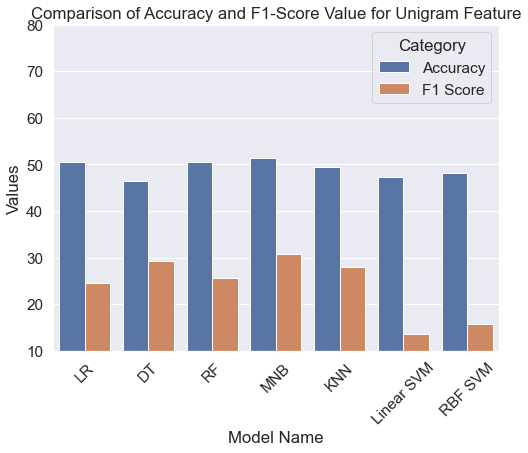

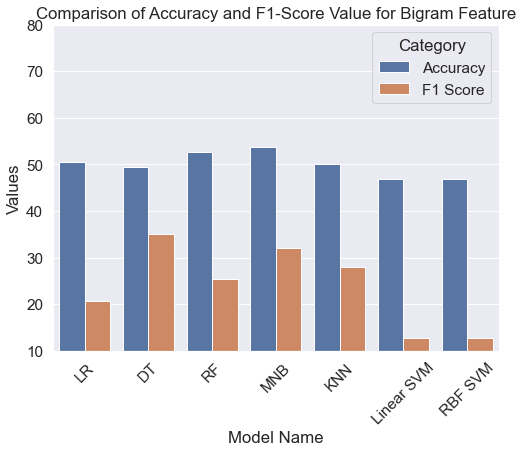

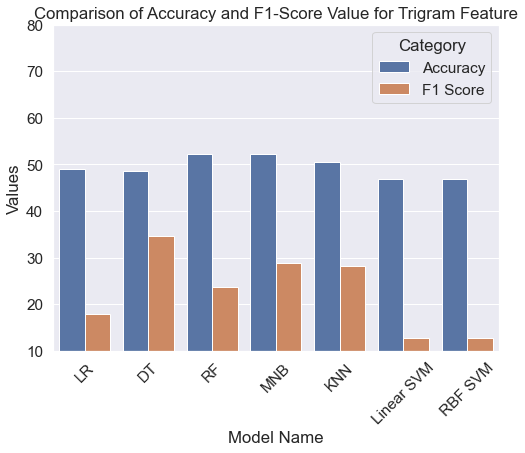

In [1310]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(f'./{gram}_performance.json'))
  table = performance_table(accuracy)
  df = pd.melt(table[['Accuracy','F1 Score','Model Name']], id_vars="Model Name", var_name="Category", value_name="Values")
  plt.figure(figsize=(8,6))
  ax = plt.subplot()
  sns.barplot(data=df,x='Model Name', y='Values' ,hue='Category')
  ax.set_xlabel('Model Name') 
  ax.set_title(f'Comparison of Accuracy and F1-Score Value for {gram} Feature')
  ax.set_ylim([10,80])
  ax.xaxis.set_ticklabels(table['Model Name'], rotation=45);

In [1311]:
dataset

,Comment,Label,cleaned,length,ReviewLength
0,ফালতু নিউজ,2.0,ফালতু নিউজ,2,2
1,য়ত পাগল আছে সব ব্রা... মিথ্যা কথা বলে তার চৌদ...,3.0,য়ত পাগল আছ সব ব্ মিথ্যা কথা বলে তার চৌদ্দ গোষ্...,16,16
2,মেসি ৩ পুয়ার বাব😁,1.0,মেসি ৩ পুয় বাব,4,4
3,বাদ দেন বাই বেডি মানুষ,3.0,বাদ দেন বাই বেডি মানুষ,5,5
4,আমি কে তুমি কেপাংয়ালি পাংয়ালি,7.0,আমি কে তুমি কেপাংয়া পাংয়া,5,5
...,...,...,...,...,...
2175,"এরা পু***** মারামারিতে বেশি ব্যস্ত, খেলবে কি করে!",3.0,এর পু মারামারি বেশি ব্যস্ত খেলবে কি করে,8,8
2176,মেয়েটির মাথা ভর্তি গোবর। মেসি আর ডিমারিয়া কে...,3.0,মেয়ে মাথা ভর্তি গোবর মেসি আর ডিমারিয়া কে বলে...,18,18
2177,যা করার তা বাদ দিয়ে অন্য কিছুতে মনোযোগ দিলে য...,1.0,যা কর তা বাদ দিয়ে অন্য কিছু মনোযোগ দিলে যা হয়,11,11
2178,১টি,1.0,১টি,1,1
